In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data set

In [2]:
data=pd.read_csv('car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


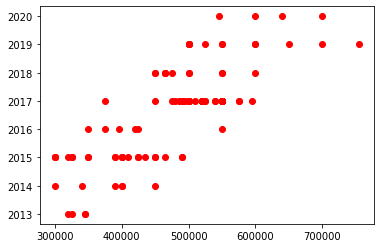

In [3]:
plt.scatter(data['Price'],data['Year'],color='red')
plt.show()

using scatter plot we can understand that there is a strong postive linear correlation between price and year

Split the data in to features (independant) & target(dependant) variable.

In [4]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [9]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64

In [10]:
predictions

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

ValueError: ignored

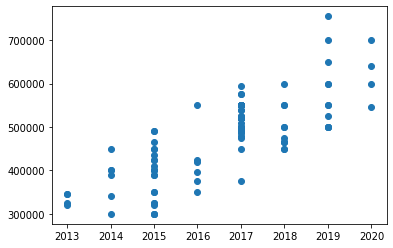

In [12]:
plt.scatter(data['Year'],data['Price'])
plt.plot(data['Year'],predictions,'r')
plt.show()

The car price in year 2022

In [13]:
lr.predict([[2022]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([740160.11937766])

In [14]:
pip install -scikitlearn scipy matplotlib


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -s


In [15]:
pip install --upgrade scikit-learn scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Linear Regression**

In [16]:
from sklearn.metrics import mean_squared_error,r2_score

In [17]:
print('MSE:',mean_squared_error(y_test,predictions))
print('R Square:',r2_score(y_test,predictions))

MSE: 3878767151.073449
R Square: 0.4347961632108023


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
lr=LinearRegression()
model1=lr.fit(x_train,y_train)
predictions=model1.predict(x_test)
print('Mean Squared Error:',mean_squared_error(y_test,predictions))
print('R Squared Error:',r2_score(y_test,predictions))

Mean Squared Error: 4326906256.829671
R Squared Error: 0.36759313425902185


# Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

In [20]:
lasso.fit(x_train,y_train)

Lasso()

In [21]:
y_pred=lasso.predict(x_test)
y_pred

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [22]:
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R square:%.2f'% lasso.score(x_test,y_test))

Mean Squared Error: 4326859771.015669
R square:0.37


In [23]:
print('intercept:%.2f' % lasso.intercept_)

intercept:-95520091.25


In [24]:
print('Slope:%.2f' % lasso.coef_[0])

Slope:47608.16


ValueError: ignored

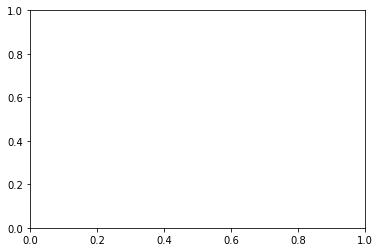

In [25]:
lasso=Lasso(alpha=.1)
lasso_coef=lasso.fit(x,y).coef_
plt.plot(range(len(x)),lasso_coef)
plt.show()